In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

variables_df = pd.read_excel("../raw/PAKDD2010_VariablesList.XLS")
column_names = variables_df['Var_Title'].iloc[:54].tolist()

data_df = pd.read_csv("../raw/PAKDD2010_Modeling_Data.txt", sep='\t', header=None, encoding='latin1')
column_names[9] = "EDUCATION_LEVEL_1"
column_names[43] = "EDUCATION_LEVEL_2"
data_df.columns = column_names

# Definir la lista de columnas numéricas
numerical_cols = data_df.select_dtypes(include=[np.number]).columns.tolist()
# Definir Dataframe con las variables numericas
data_num = data_df[numerical_cols].copy()

C:\Users\hugoc\AppData\Local\Temp\ipykernel_23548\33267815.py:13: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("../raw/PAKDD2010_Modeling_Data.txt", sep='\t', header=None, encoding='latin1')


In [85]:
# Mostrar dimensiones 
display(HTML(data_df.head(10).to_html(index=False)))
print("Dimensiones del DataFrame (filas, columnas):", data_df.shape)

ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL_1,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL_2,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1
6,C,10,0,0,1,M,2,0,0,MG,CARMO DO RIO CLARO,1,MG,ALFENAS,Campos Eliseos,Y,33,1.0,4.0,N,1,500.0,0.0,0,0,0,0,0,1,1,0.0,1,Y,MG,ALFENAS,JARDIM SAO CARLOS,N,,0,9.0,2.0,0.0,0.0,0,0,0,0,2,N,40,371,371,1
7,C,15,Carga,0,1,F,2,2,0,BA,salvador,1,BA,SALVADOR,VALERIA,Y,81,1.0,1.0,N,1,320.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,40,413,413,1
8,C,25,Web,0,1,F,1,0,0,MG,ATALEIA,1,SP,Itapecerica da Serra,Lagoa,N,,1.0,4.0,N,1,489.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,Barueri,alphaville Industrial,Y,5,0,11.0,2.0,NaN,NaN,0,0,0,0,1,N,28,686,686,0
9,C,15,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,MACATUBA,PLANALTO,Y,12,1.0,0.0,N,1,450.0,0.0,0,0,0,0,0,1,1,0.0,1,Y,,NaN,NaN,N,,0,0.0,2.0,0.0,0.0,0,0,0,0,2,N,31,172,172,0
10,C,5,0,0,1,F,1,0,0,RS,SANTA MARIA,1,RS,PORTO ALEGRE,BOM JESUS,Y,54,1.0,5.0,N,1,1507.0,0.0,1,1,0,0,0,1,1,0.0,1,Y,RS,PORTO ALEGRE,MENINO DEUS,Y,54,0,9.0,2.0,11.0,0.0,0,0,0,0,1,N,41,914,914,0


Dimensiones del DataFrame (filas, columnas): (50000, 54)


In [86]:
# Mostrar el nombre de todas las columnas y sus tipos de dato
print("\nTipos de dato de cada columna:")
print(data_df.dtypes)
print(f"Hay {len(numerical_cols)} columnas numéricas")


Tipos de dato de cada columna:
ID_CLIENT                           int64
CLERK_TYPE                         object
PAYMENT_DAY                         int64
APPLICATION_SUBMISSION_TYPE        object
QUANT_ADDITIONAL_CARDS              int64
POSTAL_ADDRESS_TYPE                 int64
SEX                                object
MARITAL_STATUS                      int64
QUANT_DEPENDANTS                    int64
EDUCATION_LEVEL_1                   int64
STATE_OF_BIRTH                     object
CITY_OF_BIRTH                      object
NACIONALITY                         int64
RESIDENCIAL_STATE                  object
RESIDENCIAL_CITY                   object
RESIDENCIAL_BOROUGH                object
FLAG_RESIDENCIAL_PHONE             object
RESIDENCIAL_PHONE_AREA_CODE        object
RESIDENCE_TYPE                    float64
MONTHS_IN_RESIDENCE               float64
FLAG_MOBILE_PHONE                  object
FLAG_EMAIL                          int64
PERSONAL_MONTHLY_INCOME           float64
OT

In [87]:
display(HTML(data_num.head(10).to_html(index=False)))
print("Dimensiones del DataFrame (filas, columnas):", data_num.shape)

ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL_1,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL_2,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET_LABEL_BAD=1
1,5,0,1,6,1,0,1,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,0,9.0,4.0,NaN,NaN,0,0,0,0,1,32,1
2,15,0,1,2,0,0,1,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,0,11.0,4.0,11.0,NaN,0,0,0,0,1,34,1
3,5,0,1,2,0,0,1,1.0,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,0,11.0,NaN,NaN,NaN,0,0,0,0,1,27,0
4,20,0,1,2,0,0,1,NaN,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,1,61,0
5,10,0,1,2,0,0,1,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,0,9.0,5.0,NaN,NaN,0,0,0,0,1,48,1
6,10,0,1,2,0,0,1,1.0,4.0,1,500.0,0.0,0,0,0,0,0,1,1,0.0,1,0,9.0,2.0,0.0,0.0,0,0,0,0,2,40,1
7,15,0,1,2,2,0,1,1.0,1.0,1,320.0,0.0,0,0,0,0,0,0,0,0.0,0,0,11.0,4.0,11.0,NaN,0,0,0,0,1,40,1
8,25,0,1,1,0,0,1,1.0,4.0,1,489.0,0.0,0,0,0,0,0,0,0,0.0,0,0,11.0,2.0,NaN,NaN,0,0,0,0,1,28,0
9,15,0,1,1,0,0,1,1.0,0.0,1,450.0,0.0,0,0,0,0,0,1,1,0.0,1,0,0.0,2.0,0.0,0.0,0,0,0,0,2,31,0
10,5,0,1,1,0,0,1,1.0,5.0,1,1507.0,0.0,1,1,0,0,0,1,1,0.0,1,0,9.0,2.0,11.0,0.0,0,0,0,0,1,41,0


Dimensiones del DataFrame (filas, columnas): (50000, 34)


# Missing Values

In [88]:
# Comprobar si hay valores nulos en cada columna
print("\nCantidad de missing values")
missing_count = data_num.isnull().sum()

missing_pct = (missing_count / len(data_num)) * 100

missing_df = pd.DataFrame({
    "variable": missing_count.index,
    "missing_count": missing_count.values,
    "missing_pct": missing_pct.values
})

missing_df_sorted = missing_df.sort_values(by="missing_pct", ascending=False).reset_index(drop=True)
print(missing_df_sorted)


Cantidad de missing values
                          variable  missing_count  missing_pct
0                EDUCATION_LEVEL_2          32338       64.676
1             MATE_PROFESSION_CODE          28884       57.768
2                  PROFESSION_CODE           7756       15.512
3                  OCCUPATION_TYPE           7313       14.626
4              MONTHS_IN_RESIDENCE           3777        7.554
5                   RESIDENCE_TYPE           1349        2.698
6                      PAYMENT_DAY              0        0.000
7                        ID_CLIENT              0        0.000
8           QUANT_ADDITIONAL_CARDS              0        0.000
9              POSTAL_ADDRESS_TYPE              0        0.000
10                      FLAG_EMAIL              0        0.000
11         PERSONAL_MONTHLY_INCOME              0        0.000
12                   OTHER_INCOMES              0        0.000
13                       FLAG_VISA              0        0.000
14                QUANT_DEP

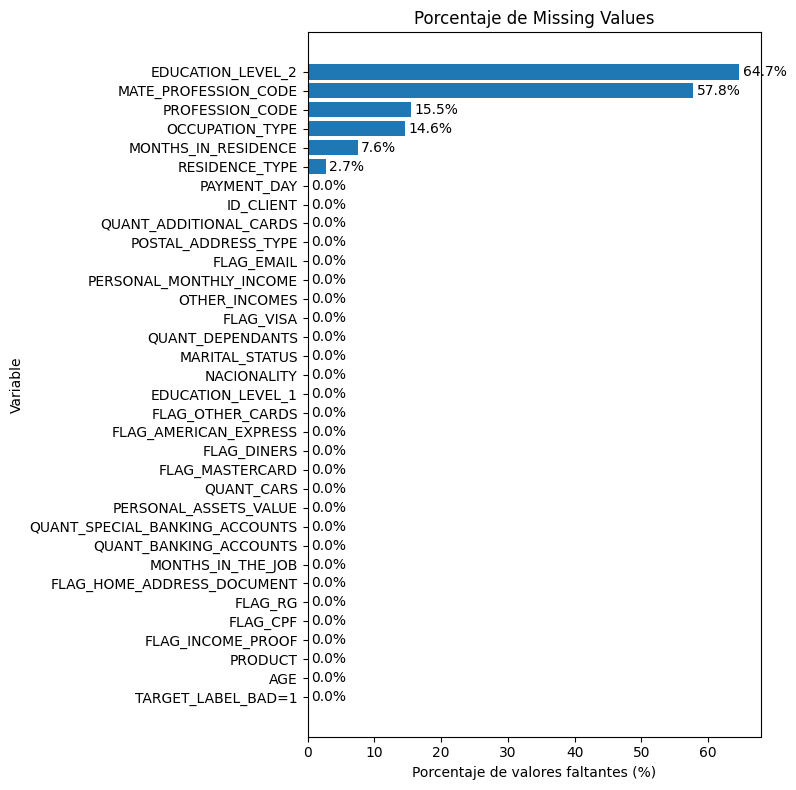

In [89]:
# EXTRAER NOMBRES Y PORCENTAJES
variables = missing_df_sorted["variable"]
pct_missing = missing_df_sorted["missing_pct"]

# Crear figura y ejes
plt.figure(figsize=(8, 8))              # Tamaño ajustable según la cantidad de variables
plt.barh(variables, pct_missing)         # Gráfico horizontal para que los nombres se lean mejor

# Etiquetas y título
plt.xlabel("Porcentaje de valores faltantes (%)")
plt.ylabel("Variable")
plt.title("Porcentaje de Missing Values")

# Invertir eje Y para mostrar primero la variable con más missing
plt.gca().invert_yaxis()

# Mostrar valores encima de cada barra (opcional)
for i, v in enumerate(pct_missing):
    plt.text(v + 0.5, i, f"{v:.1f}%", va="center")

plt.tight_layout()
plt.show()


# Deteccion de Outliers via IQR

In [96]:
# Mostrar un resumen rápido
display(data_num.describe().T)

,count,mean,std,min,25%,50%,75%,max
ID_CLIENT,50000.0,25000.500000,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0
PAYMENT_DAY,50000.0,12.869920,6.608385,1.0,10.00,10.0,15.00,25.0
QUANT_ADDITIONAL_CARDS,50000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
POSTAL_ADDRESS_TYPE,50000.0,1.006540,0.080606,1.0,1.00,1.0,1.00,2.0
MARITAL_STATUS,50000.0,2.148400,1.322850,0.0,1.00,2.0,2.00,7.0
QUANT_DEPENDANTS,50000.0,0.650520,1.193655,0.0,0.00,0.0,1.00,53.0
EDUCATION_LEVEL_1,50000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
NACIONALITY,50000.0,0.961600,0.202105,0.0,1.00,1.0,1.00,2.0
RESIDENCE_TYPE,48651.0,1.252225,0.867833,0.0,1.00,1.0,1.00,5.0
MONTHS_IN_RESIDENCE,46223.0,9.727149,10.668841,0.0,1.00,6.0,15.00,228.0


In [97]:
# Calcular Q1 (25 %) y Q3 (75 %) para cada columna
Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR  

# Construir un DataFrame resumen con min, 25%, 50%, 75%, max, límites y número único de valores
stats = data_num.describe().T.reset_index().rename(columns={'index':'variable'})
stats['lower_bound'] = lower_bound.values
stats['upper_bound'] = upper_bound.values
stats['n_unique'] = data_num.nunique().values

# Mostrar los primeros registros del resumen
display(stats.head(10))

,variable,count,mean,std,min,25%,50%,75%,max,lower_bound,upper_bound,n_unique
0,ID_CLIENT,50000.0,25000.500000,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0,-24998.5,74999.5,50000
1,PAYMENT_DAY,50000.0,12.869920,6.608385,1.0,10.00,10.0,15.00,25.0,2.5,22.5,6
2,QUANT_ADDITIONAL_CARDS,50000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1
3,POSTAL_ADDRESS_TYPE,50000.0,1.006540,0.080606,1.0,1.00,1.0,1.00,2.0,1.0,1.0,2
4,MARITAL_STATUS,50000.0,2.148400,1.322850,0.0,1.00,2.0,2.00,7.0,-0.5,3.5,8
5,QUANT_DEPENDANTS,50000.0,0.650520,1.193655,0.0,0.00,0.0,1.00,53.0,-1.5,2.5,17
6,EDUCATION_LEVEL_1,50000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1
7,NACIONALITY,50000.0,0.961600,0.202105,0.0,1.00,1.0,1.00,2.0,1.0,1.0,3
8,RESIDENCE_TYPE,48651.0,1.252225,0.867833,0.0,1.00,1.0,1.00,5.0,1.0,1.0,6
9,MONTHS_IN_RESIDENCE,46223.0,9.727149,10.668841,0.0,1.00,6.0,15.00,228.0,-20.0,36.0,88


In [102]:
## Contar Outliers por variable

# Para cada columna, identificar cuántos valores quedan por debajo del umbral inferior o por encima del superior
outlier_counts = {}
n_filas = len(data_num)

for col in data_num.columns:
    # Lectura de los valores de esa columna
    serie = data_num[col]
    lb = lower_bound[col]
    ub = upper_bound[col]
    
    # Marcar como outlier si está fuera de [lb, ub]
    mask_outlier = (serie < lb) | (serie > ub)
    count = mask_outlier.sum()
    
    outlier_counts[col] = {
        "outlier_count": int(count),
        "outlier_pct": float(count / n_filas * 100)
    }

# Convertir a DataFrame para ordenar y visualizar
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient="index")
outlier_df = outlier_df.rename_axis("variable").reset_index()
outlier_df_sorted = outlier_df.sort_values(by="outlier_pct", ascending=False).reset_index(drop=True)

print(outlier_df_sorted)

# Unir con estadísticas básicas para contexto
summary_outliers = stats.merge(outlier_df_sorted, on="variable")

# Mostrar resultado completo
display(summary_outliers)


                          variable  outlier_count  outlier_pct
0                  PROFESSION_CODE          12152       24.304
1                       FLAG_EMAIL           9886       19.772
2                      PAYMENT_DAY           8787       17.574
3                   MARITAL_STATUS           7913       15.826
4                          PRODUCT           7310       14.620
5                   RESIDENCE_TYPE           7079       14.158
6                        FLAG_VISA           5572       11.144
7                  FLAG_MASTERCARD           4873        9.746
8          PERSONAL_MONTHLY_INCOME           4136        8.272
9                 QUANT_DEPENDANTS           3978        7.956
10                   OTHER_INCOMES           2773        5.546
11           PERSONAL_ASSETS_VALUE           2391        4.782
12                     NACIONALITY           2116        4.232
13               EDUCATION_LEVEL_2           1667        3.334
14             MONTHS_IN_RESIDENCE           1344      

,variable,count,mean,std,min,25%,50%,75%,max,lower_bound,upper_bound,n_unique,outlier_count,outlier_pct
0,ID_CLIENT,50000.0,25000.500000,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0,-24998.5,74999.5,50000,0,0.000
1,PAYMENT_DAY,50000.0,12.869920,6.608385,1.0,10.00,10.0,15.00,25.0,2.5,22.5,6,8787,17.574
2,QUANT_ADDITIONAL_CARDS,50000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1,0,0.000
3,POSTAL_ADDRESS_TYPE,50000.0,1.006540,0.080606,1.0,1.00,1.0,1.00,2.0,1.0,1.0,2,327,0.654
4,MARITAL_STATUS,50000.0,2.148400,1.322850,0.0,1.00,2.0,2.00,7.0,-0.5,3.5,8,7913,15.826
5,QUANT_DEPENDANTS,50000.0,0.650520,1.193655,0.0,0.00,0.0,1.00,53.0,-1.5,2.5,17,3978,7.956
6,EDUCATION_LEVEL_1,50000.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1,0,0.000
7,NACIONALITY,50000.0,0.961600,0.202105,0.0,1.00,1.0,1.00,2.0,1.0,1.0,3,2116,4.232
8,RESIDENCE_TYPE,48651.0,1.252225,0.867833,0.0,1.00,1.0,1.00,5.0,1.0,1.0,6,7079,14.158
9,MONTHS_IN_RESIDENCE,46223.0,9.727149,10.668841,0.0,1.00,6.0,15.00,228.0,-20.0,36.0,88,1344,2.688


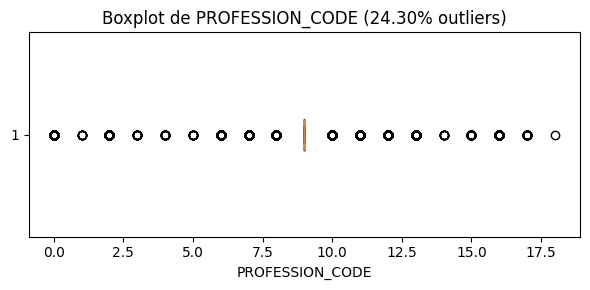

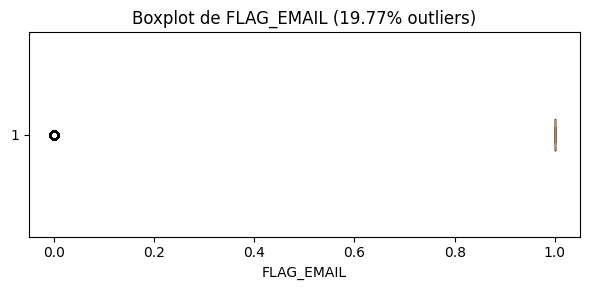

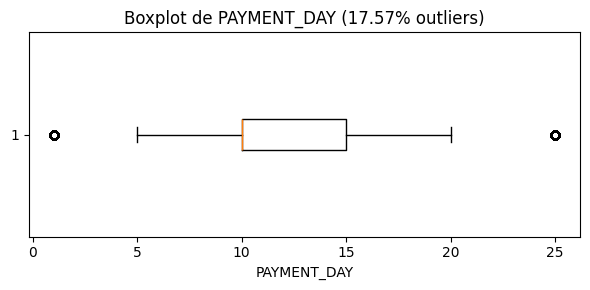

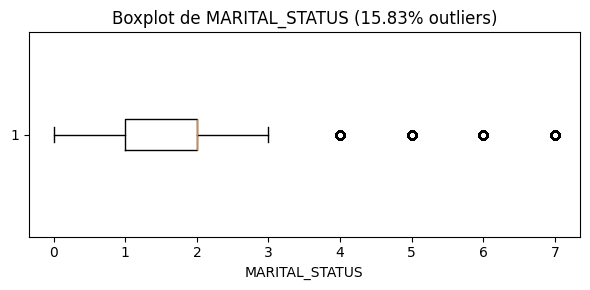

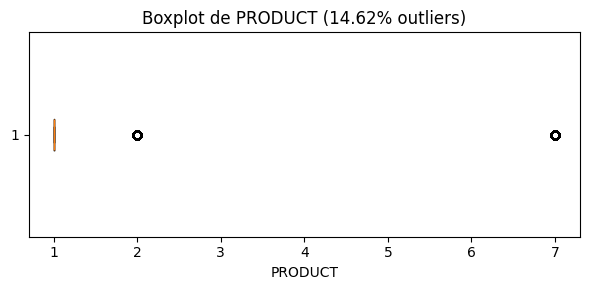

In [99]:
# Seleccionar las 5 variables con mayor porcentaje de outliers
top5 = summary_outliers.sort_values(by="outlier_pct", ascending=False).head(5)["variable"].tolist()

for col in top5:
    plt.figure(figsize=(6, 3))
    plt.boxplot(data_num[col].dropna(), vert=False)
    plt.title(f"Boxplot de {col} ({summary_outliers.loc[summary_outliers['variable']==col, 'outlier_pct'].values[0]:.2f}% outliers)")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


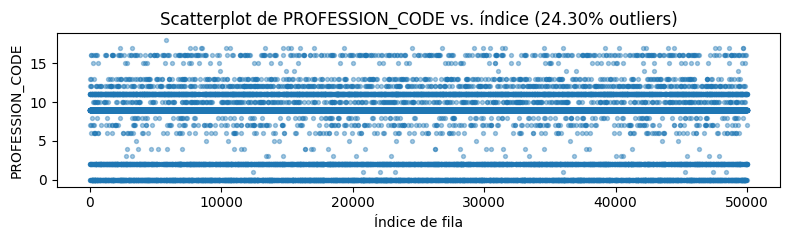

In [100]:
# Variable con mayor porcentaje de outliers
col_top = summary_outliers.loc[summary_outliers["outlier_pct"].idxmax(), "variable"]

plt.figure(figsize=(8, 2.5))
plt.scatter(data_num.index, data_num[col_top], s=8, alpha=0.4)
plt.title(f"Scatterplot de {col_top} vs. índice ({summary_outliers.loc[summary_outliers['variable']==col_top, 'outlier_pct'].values[0]:.2f}% outliers)")
plt.xlabel("Índice de fila")
plt.ylabel(col_top)
plt.tight_layout()
plt.show()


In [101]:
# Tomar la variable con más outliers
variable_top = summary_outliers.loc[summary_outliers["outlier_pct"].idxmax(), "variable"]
lb_top = summary_outliers.loc[summary_outliers["variable"] == variable_top, "lower_bound"].values[0]
ub_top = summary_outliers.loc[summary_outliers["variable"] == variable_top, "upper_bound"].values[0]

# Filtrar los registros atípicos en data_num
outliers_top = data_num[(data_num[variable_top] < lb_top) | (data_num[variable_top] > ub_top)]

# Mostrar los primeros 10 valores atípicos de esa variable
print(f"Primeros 10 outliers en la variable `{variable_top}`:")
display(outliers_top[[variable_top]].head(10))

# Si queremos ver contexto completo (todas las columnas de data_df):
# indices = outliers_top.index
# display(data_df.loc[indices].head(10))


Primeros 10 outliers en la variable `PROFESSION_CODE`:


,PROFESSION_CODE
1,11.0
2,11.0
6,11.0
7,11.0
8,0.0
15,2.0
17,13.0
20,7.0
26,0.0
29,11.0


# Conclusiones

1. Variables categóricas o binarias
Las siguientes variables están codificadas con pocos valores únicos (n_unique pequeño) o representan categorías/textos numéricos. El método IQR detecta “outliers” porque su Q1 y Q3 suelen ser iguales. Para estas, simplemente conviene tratarlas como categóricas/dummies y omitirles la detección de outliers:

* PAYMENT_DAY (6 valores posibles: 1, 5, 10, 15, 20, 25): IQR marca como outliers los días 1–2 (por debajo de ~3) y los días 23–25 (por encima de ~23), pero en realidad son todas fechas válidas del mes.
Recomendación: convertir a variable categórica (o variable ordinal con 6 niveles). No eliminar ni transformar por IQR.

* POSTAL_ADDRESS_TYPE (2 categorías)

* MARITAL_STATUS (8 categorías)

* EDUCATION_LEVEL_1 (1 categoría constante)

* NACIONALITY (3 categorías)

* RESIDENCE_TYPE (6 categorías)

* FLAG_EMAIL, FLAG_VISA, FLAG_MASTERCARD, FLAG_DINERS, FLAG_AMERICAN_EXPRESS, FLAG_OTHER_CARDS, FLAG_HOME_ADDRESS_DOCUMENT, FLAG_RG, FLAG_CPF, FLAG_INCOME_PROOF, TARGET_LABEL_BAD=1 (binarias)

* PRODUCT (3 categorías)

* PROFESSION_CODE, OCCUPATION_TYPE, MATE_PROFESSION_CODE, EDUCATION_LEVEL_2 (entre 6 y 19 códigos)

2. Variables constantes o de valor único
* QUANT_ADDITIONAL_CARDS (n_unique = 1, todos ceros)

* EDUCATION_LEVEL_1 (n_unique = 1, todos ceros)

Dado que no aportan variabilidad, se recomienda eliminarlas, porque no contribuyen al análisis ni al modelo.

3. Variables de conteo/discretas con outliers moderados
Estas variables son conteos (número de elementos) o cantidades que, al aplicar la regla IQR, marcan como outliers a valores muy altos (o muy bajos) pero en muchos casos siguen siendo observaciones válidas. Las estrategias posibles:

-Revisar si los outliers son errores de captura (valores negativos o imposibles). Si los valores atípicos son negativos, cero donde no debería, o claramente erróneos, reemplazarlos por NaN e imputar o eliminar la fila entera del dataset original.

-Si los outliers son simplemente valores extremos plausibles, decidir entre:
    Mantenerlos tal cual (si son relevantes para el negocio/modelo).
    Truncarlos (winsorizar) a un umbral razonable (por ejemplo, al percentil 99).
    Transformarlos (por ejemplo, log) si hay una amplia gama de valores.

* QUANT_DEPENDANTS (n_unique = 17, outlier_pct = 7.956 %)
    -Rango de valores: min = 0, Q1 = 0, mediana = 0, Q3 = 1, max = 35.
    -Límite superior IQR = Q3 + 1.5·IQR = 1 + 1.5·1 = 2.5. Es decir, “> 2” se considera outlier. Valores como 3–35 aparecen, pero son familias grandes y probablemente válidos.
Recomendación:
    Para distinguir clientes con 1–2 dependientes vs. muchos, se puede agrupar a partir de 3 en una sola categoría (“3+”).
    O conservar el conteo completo y winsorizar a 3 (por ejemplo)
* MONTHS_IN_RESIDENCE (n_unique = 88, outlier_pct = 2.688 %)
    Rango: min = 0, Q1 = 1, mediana = 6, Q3 = 15, max = 106.
    Límite superior ≈ 15 + 1.5·14 = ~36. Los casos con > 36 meses (3 años) aparecen como outliers, pero tener 3 a 8 años en un mismo domicilio puede ser muy normal.
Recomendación:
    Se puede transformar con log
    Winsorizar
    Dejar como esta

* QUANT_BANKING_ACCOUNTS (n_unique = 3, outlier_pct = 0 %)
* QUANT_SPECIAL_BANKING_ACCOUNTS (n_unique = 3, outlier_pct = 0 %)
* QUANT_CARS (n_unique = 2, outlier_pct = 0 %)
Estas tres variables tienen muy pocos valores únicos (0, 1, 2 o similar). IQR no marcó outliers.
Recomendación: se puede tratarlas como discretas/categóricas (o mantenlas numéricas enteras)

4. Variables continuas (financieras) con outliers a tratar
* PERSONAL_MONTHLY_INCOME (n_unique = 5 495, outlier_pct = 8.272 %)
    Rango: min = 60, Q1 = 360, mediana = 500, Q3 = 800, max = 25 000.
    Límite superior ≈ 800 + 1.5·(800 − 360) = 800 + 1.5·440 = 800 + 660 = 1 460. Cualquier ingreso mensual > 1 460 es marcado como outlier (~8.3 %).
    Estos valores altos pueden ser legítimos (ej. clientes de ingreso alto).
Recomendación:
    Para una distribución más simétrica o modelos lineales, aplicar transformación logarítmica
    Alternativa: winsorizar al percentil 99
* OTHER_INCOMES (n_unique = 615, outlier_pct = 5.546 %)
    Rango: min = 0, Q1 = 0, mediana = 0, Q3 = 0, max = 25 000.
    Límite superior = 0 + 1.5·0 = 0. Es decir que cualquier ingreso adicional > 0 se marca como outlier (explica el 5.5 %).
    No es correcto eliminarlos: representan clientes con ingresos adicionales.
Recomendación:
    Crear variable binaria
    Transformar con log
* PERSONAL_ASSETS_VALUE (n_unique = 153, outlier_pct = 4.782 %)
    Rango: min = 2, Q1 ~ 0? Revisa que era variable no nula. En la descripción, el Q1 parece ser 0.
    Límite superior = Q3 + 1.5·IQR; outliers ≈ 4.8 %. Valores altos (por ejemplo, 6 000 000) aparecen.
Recomendación:
    Aplicar log1p para acomodar cola larga
    winsorizar al percentil 99

5. Variable “AGE”
AGE (n_unique = 89, outlier_pct = 0.250 %)
Rango: min = 18, Q1 ~ 25, mediana ~ 35, Q3 ~ 50, max = 106.
Límite superior ≈ 50 + 1.5·(50 − 25) = 50 + 1.5·25 = 87.5. Por tanto, edades > 87 aparecen como outliers (0.25 %).
Estos outliers pueden corresponder a clientes que pueden ser excepciones reales.

Recomendación:
Se podria truncar o transformar 

6. Variables sin outliers o outliers insignificantes
* ID_CLIENT
    n_unique = número de filas; no aplicar EDA de outliers.
    Recomendación: no utilizar en modelado, solo sirve de índice.
* FLAG_DINERS (n_unique = 2, outlier_pct = 0.132 %)
* QUANT_BANKING_ACCOUNTS (n_unique = 3, outlier_pct = 0 %)
* QUANT_SPECIAL_BANKING_ACCOUNTS (n_unique = 3, outlier_pct = 0 %)
* QUANT_CARS (n_unique = 2, outlier_pct = 0 %)
* EDUCATION_LEVEL_2 (n_unique = 6, outlier_pct = 3.334 %)
* MATE_PROFESSION_CODE (n_unique = 18, outlier_pct = 0 %)

Para todas estas, el método IQR detectó pocos o ningún outlier.
    Si son categorías o flags: dejarlas como category.
    Si son conteos con valores muy discretos: dejarlas como enteros o agrupar categorías con baja frecuencia.

# Analisis de correlacion entre variables numericas

c:\AnyoneAI\Proyecto final\CreditRiskAnalysisProject\testenv\lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\AnyoneAI\Proyecto final\CreditRiskAnalysisProject\testenv\lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\AnyoneAI\Proyecto final\CreditRiskAnalysisProject\testenv\lib\site-packages\pandas\core\nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


Top 10 variables más correlacionadas con TARGET_LABEL_BAD=1:


,variable,pearson,spearman
0,AGE,-0.107886,-0.113872
1,PAYMENT_DAY,0.070633,0.067130
2,OCCUPATION_TYPE,0.040216,0.047239
3,MATE_PROFESSION_CODE,-0.034505,-0.034603
4,EDUCATION_LEVEL_2,-0.032215,-0.032399
5,MARITAL_STATUS,-0.030380,-0.056406
6,MONTHS_IN_RESIDENCE,-0.029336,-0.021010
7,PRODUCT,0.019293,0.009163
8,RESIDENCE_TYPE,0.019168,0.023100
9,FLAG_MASTERCARD,-0.017658,-0.017658


C:\Users\hugoc\AppData\Local\Temp\ipykernel_23548\645930295.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pearson', y='variable', data=top10, palette='viridis')


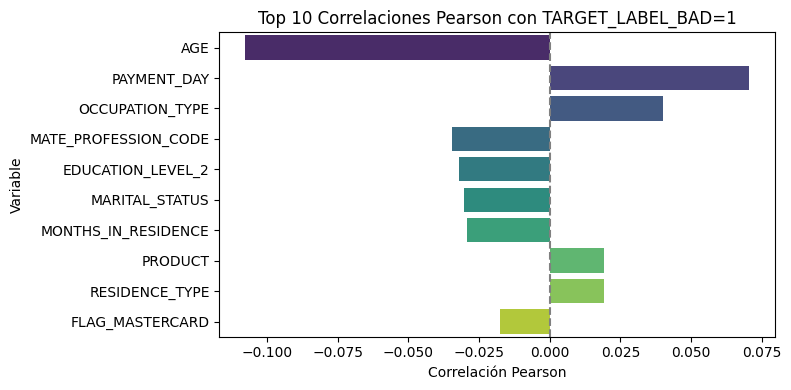

KeyError: "None of ['variable'] are in the columns"

<Figure size 400x825 with 0 Axes>

In [ ]:
import seaborn as sns

# Convertir la variable target a entero (0 o 1)
data_num['TARGET_LABEL_BAD=1'] = data_num['TARGET_LABEL_BAD=1'].astype(int)

# Identificar variables numéricas (excluyendo la target)
vars_numeric = data_num.drop(columns=['TARGET_LABEL_BAD=1']).select_dtypes(include=[np.number]).columns

# 4) Calcular correlaciones Pearson y Spearman entre cada variable y la target
pearson_corr = data_num[vars_numeric].corrwith(data_num['TARGET_LABEL_BAD=1'], method='pearson')
spearman_corr = data_num[vars_numeric].corrwith(data_num['TARGET_LABEL_BAD=1'], method='spearman')

# 5) Crear un DataFrame con los resultados
corr_df = pd.DataFrame({
    'variable': vars_numeric,
    'pearson': pearson_corr.values,
    'spearman': spearman_corr.values
})

# 6) Calcular valor absoluto de Pearson para ordenar
corr_df['pearson_abs'] = corr_df['pearson'].abs()
corr_df_sorted = corr_df.sort_values(by='pearson_abs', ascending=False).reset_index(drop=True)

# 7) Mostrar las 10 variables más correlacionadas
print("Top 10 variables más correlacionadas con TARGET_LABEL_BAD=1:")
display(corr_df_sorted.head(10)[['variable', 'pearson', 'spearman']])

# 8) Gráfico de barras (horizontal) de las correlaciones Pearson top 10
top10 = corr_df_sorted.head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x='pearson', y='variable', data=top10, palette='viridis')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Top 10 Correlaciones Pearson con TARGET_LABEL_BAD=1')
plt.xlabel('Correlación Pearson')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

# 9) Heatmap de correlación Pearson para todas las variables con target
plt.figure(figsize=(4, corr_df_sorted.shape[0] * 0.25))
sns.heatmap(corr_df_sorted[['pearson']].set_index('variable'), annot=True, cmap='coolwarm', cbar_kws={'label': 'Pearson'})
plt.title('Correlación Pearson de todas las variables con TARGET_LABEL_BAD=1')
plt.tight_layout()
plt.show()

# 10) Boxplots para las 5 variables más correlacionadas
top5_vars = corr_df_sorted.head(5)['variable'].tolist()
for var in top5_vars:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='TARGET_LABEL_BAD=1', y=var, data=data_num, palette='Set2')
    plt.title(f'Boxplot de {var} según TARGET_LABEL_BAD=1')
    plt.xlabel('TARGET_LABEL_BAD=1')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


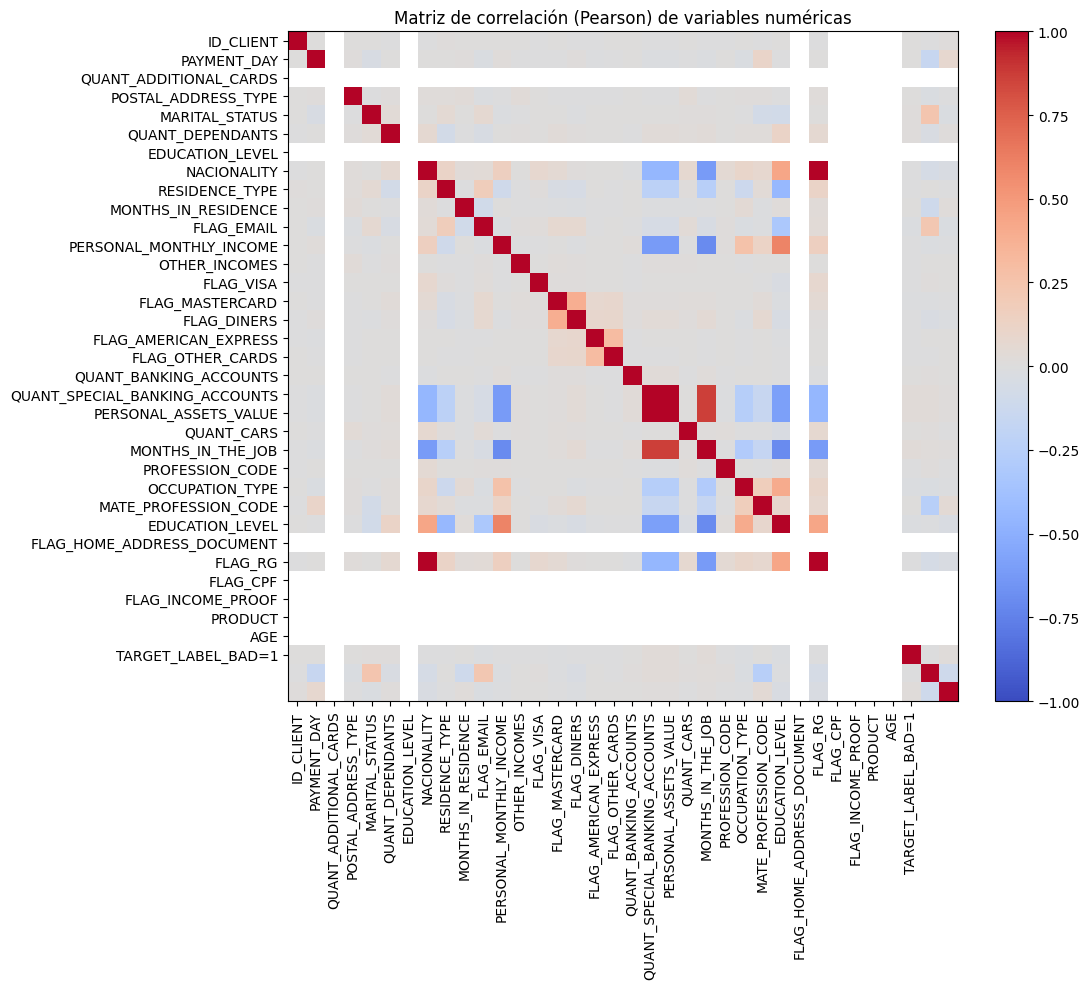

Pares con |ρ| > 0.7:
  NACIONALITY vs FLAG_RG: ρ = 1.00
  QUANT_SPECIAL_BANKING_ACCOUNTS vs PERSONAL_ASSETS_VALUE: ρ = 1.00
  QUANT_SPECIAL_BANKING_ACCOUNTS vs MONTHS_IN_THE_JOB: ρ = 0.86
  PERSONAL_ASSETS_VALUE vs MONTHS_IN_THE_JOB: ρ = 0.86


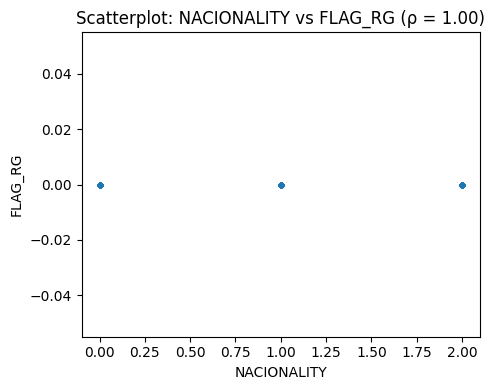

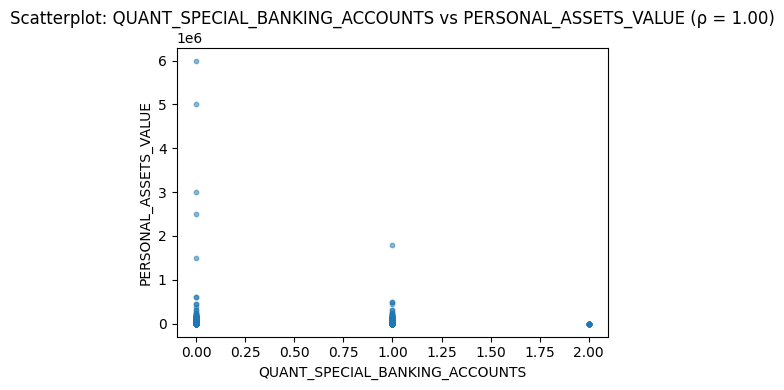

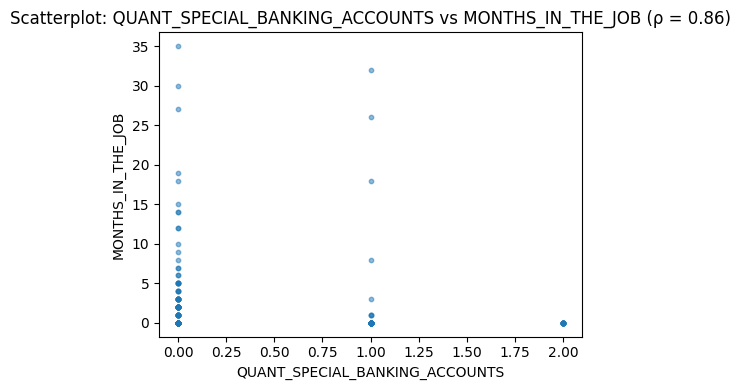

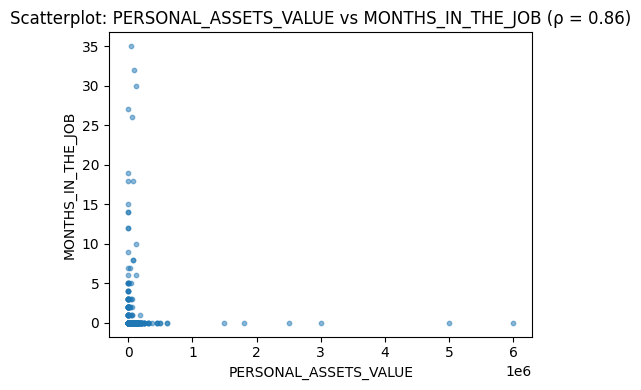

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Calcular la matriz de correlación (Pearson) solo entre variables numéricas
corr_matrix = data_df[numerical_cols].corr(method='pearson')

# 2) Mostrar el heatmap con matplotlib
plt.figure(figsize=(12, 10))
im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=90)
plt.yticks(range(len(numerical_cols)), numerical_cols)
plt.title("Matriz de correlación (Pearson) de variables numéricas")
plt.tight_layout()
plt.show()

# 3) Identificar pares con correlación absoluta > 0.7
high_corr_pairs = []
n = len(numerical_cols)
for i in range(n):
    for j in range(i+1, n):
        rho = corr_matrix.iloc[i, j]
        if abs(rho) > 0.7:
            high_corr_pairs.append((numerical_cols[i], numerical_cols[j], rho))

# 4) Imprimir la lista de pares altamente correlacionados
if high_corr_pairs:
    print("Pares con |ρ| > 0.7:")
    for col1, col2, rho in high_corr_pairs:
        print(f"  {col1} vs {col2}: ρ = {rho:.2f}")
else:
    print("No se encontraron pares con |ρ| > 0.7")

# 5) Para cada par con alta correlación, hacer un scatterplot
for col1, col2, rho in high_corr_pairs:
    plt.figure(figsize=(5, 4))
    plt.scatter(data_df[col1], data_df[col2], alpha=0.5, s=10)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f"Scatterplot: {col1} vs {col2} (ρ = {rho:.2f})")
    plt.tight_layout()
    plt.show()


# 7 Clasificacion final de variables (continuas vs discretas)

In [38]:
import pandas as pd
from IPython.display import display

# ——————————————————————————————————————————————————————————————
# 7. Clasificación final de variables (continuas vs. discretas)
# ——————————————————————————————————————————————————————————————

# 1) Asumimos que data_df y numerical_cols ya existen en este Notebook
#    (los definiste en pasos anteriores)

# 2) Para cada variable numérica, contamos cuántos valores únicos tiene y la clasificamos
classification = []
for col in numerical_cols:
    unique_count = data_df[col].nunique(dropna=True)
    
    # Criterio: si tiene menos de 20 valores únicos, la consideramos 'Discreta';
    # de lo contrario, la consideramos 'Continua'.
    var_type = 'Discreta' if unique_count < 20 else 'Continua'
    
    classification.append({
        'variable': col,
        'unique_count': unique_count,
        'type': var_type
    })

# 3) Convertimos la lista en un DataFrame para verlo en forma tabular
classification_df = pd.DataFrame(classification)

# 4) Mostramos el resultado
display(classification_df)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().